# Chapter 2:  End-to-End Machine Learning Project

In this chapter we chose the California Housing Prices dataset from the StatLib repository.  This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We
also added a categorical attribute and removed a few features for teaching purposes.

<center>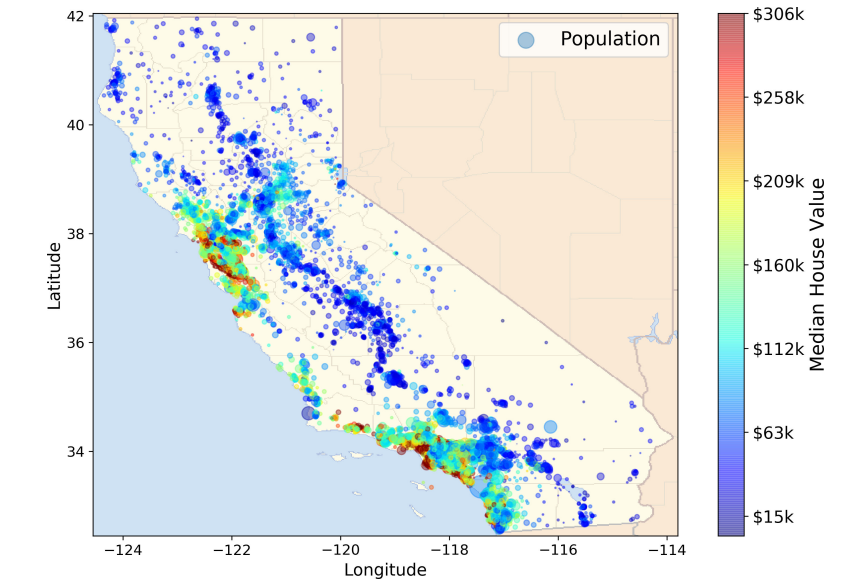</center>
<center>California housing prices</center>

## Frame the Problem
The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. How does the company expect to use and benefit from this model? This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to
evaluate your model, and how much effort you should spend tweaking it.

Your boss answers that your model’s output (a prediction of a district’s median housing price) will be fed to another Machine Learning system along with many other signals. This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

<center>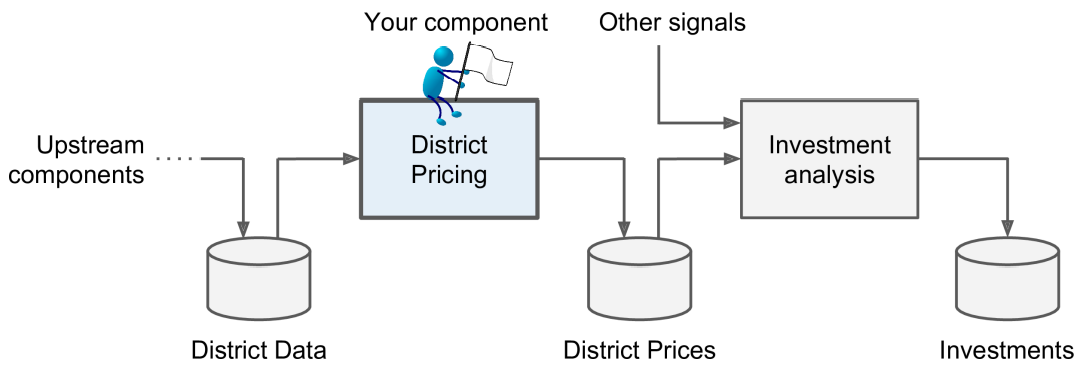</center>

**Question 1:** is it supervised  or unsupervised?

**Question 2:**  Is it a classification task, a regression task, or something else?

**Question 3:** Should
you use batch learning or online learning techniques? 

## Download the Data

In [ ]:
import os
import tarfile
from six.moves import urllib

#This is where the data are hosted
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/" 
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" #data path

#This is where we will store downloaded data
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  #Check if we have needed folders to save downloaded file. If not, Create it!
  #Use the os package
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  #Retrieve the file from the url link
  #use the urllib library : urllib.request.urlretrieve!
  tgz_path = os.path.join(housing_path,"housing.tgz")
  urllib.request.urlretrieve(housing_url , tgz_path)
  housing_tgz=tarfile.open(tgz_path)
  #Extract the file in the housing_path using tarfile library
  housing_tgz.extractall(path=housing_path)
  #End of function
  housing_tgz.close()

In [ ]:
#Use your function to retrieve the data
fetch_housing_data()

### Load the data

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  #Read the data using pandas
   db=os.path.join(housing_path,"housing.csv")
   return pd.read_csv(db)


#load the data
housing = load_housing_data()

## Take a Quick Look at the Data Structure

In [ ]:
#Let’s take a look at the top five rows using the DataFrame’s head() method 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Try info() to get a quick description of the data, in particular the 
#total number of rows, and each attribute’s type and number of non-null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive,
which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the
`value_counts()` method

In [ ]:
# Count the values in ocean_proximity column
housing['ocean_proximity'].value_counts(ascending=True)

ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: ocean_proximity, dtype: int64

To get some insights on the numerical data, you can use `describe()`

In [ ]:
#Use describe to get some numerical insights.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


(+) *The standard deviation is generally denoted σ (the Greek letter sigma), and it is the square root of the variance, which is the average of the squared deviation from the mean. When a feature has a bell-shaped normal
distribution (also called a Gaussian distribution), which is very common, the “68-95-99.7” rule applies: about
68% of the values fall within 1σ of the mean, 95% within 2σ, and 99.7% within 3σ.*

Another quick way to get a feel of the type of data you are dealing with is to plot a 
histogram for each numerical attribute. A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). You can
either plot this one attribute at a time, or you can call the `hist()` method on the
whole dataset, and it will plot a histogram for each numerical attribute. For example, you can see that slightly over 800 districts have a
median_house_value equal to about $100,000. 

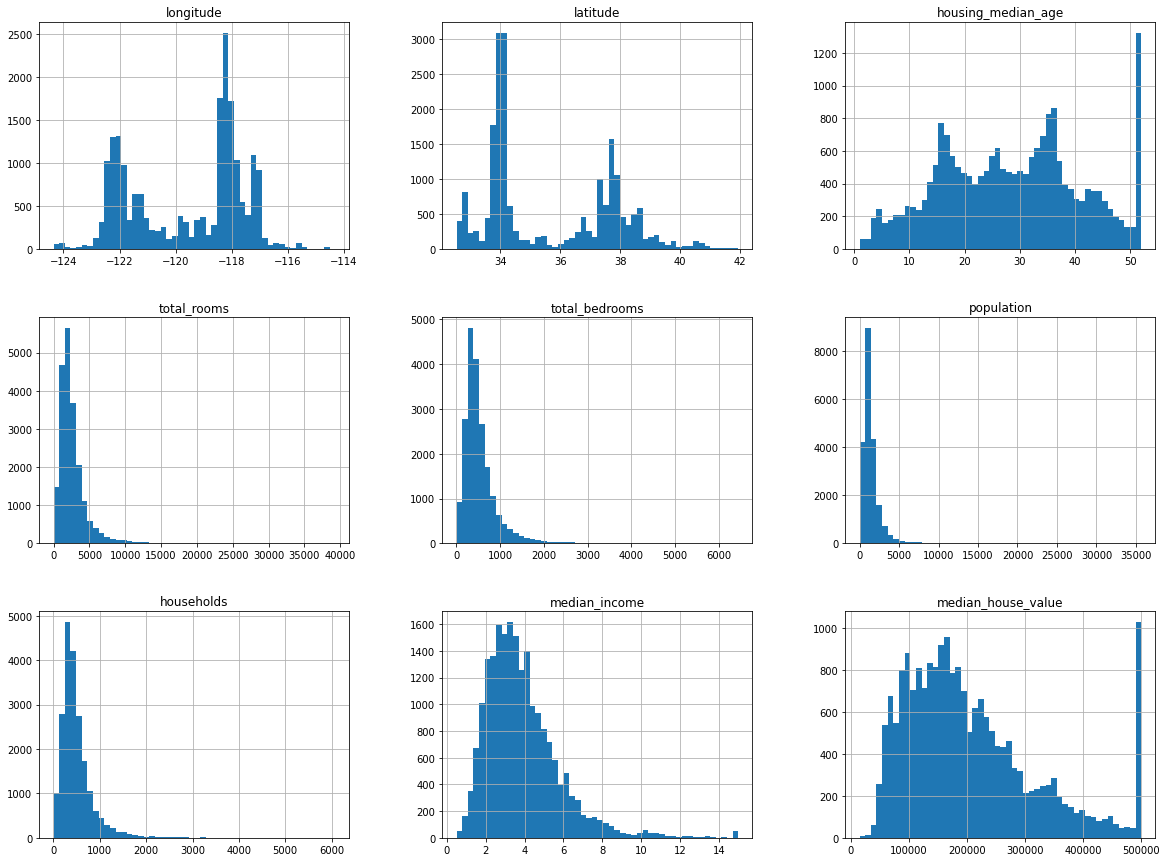

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

#apply histograms using 50 bins
housing.hist(bins=50 , figsize=(20,15))
#show the histograms
plt.show()

## Create a Test Set

In [ ]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

def split_train_test(data, test_ratio=0.2):
    shuffled_indices = np.random.permutation(len(data))
    #Get the size of test set using test_ratio
    test_size=int(len(data)*test_ratio)

    #Select test indices
    test_indices= shuffled_indices[:test_size]

    #Select train indices
    train_indices= shuffled_indices[test_size:]

    # Return train, test data using the defined indices
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
#Split the data! 
train_set, test_set = split_train_test(housing, 0.2)
#Show number of data points for each split
len(train_set), len(test_set)


(16512, 4128)

Well, sklean provide a function that can split the data. Let's try it!

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set =train_test_split(housing, test_size=0.2,random_state=42)

Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. Let’s look at the median income histogram more closely.

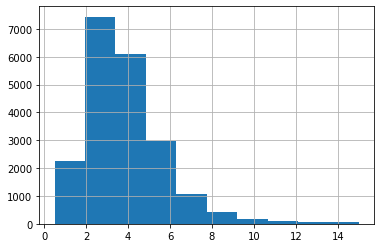

In [ ]:
housing["median_income"].hist()

## Exercice

most median income values are clustered around 1.5 to 6 (i.e., $15,000–$60,000). but some median incomes go far beyond 6. It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of the stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough.

The following code uses the
pd.cut() function to create an income category attribute with 5 categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:


In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

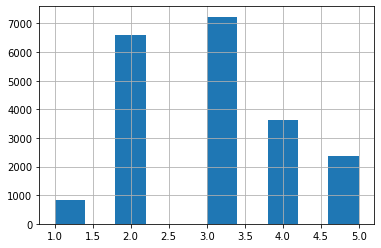

In [ ]:
housing["income_cat"].hist()

Use `StratifiedShuffleSplit` from `sklearn.model_selection` to create a stratified train/test set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


strat_train_set =housing.loc[]
strat_test_set =

Let's see the difference:

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

Now let's remove the `income_cat` column.

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

In [ ]:
housing = strat_train_set.copy()

In [ ]:
housing.plot(kind="scatter", x="", y="")

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points

In [ ]:
#Plot with alpha option

Now that’s much better: you can clearly see the high-density areas, namely the Bay
Area and around Los Angeles and San Diego, plus a long line of fairly high density in
the Central Valley, in particular around Sacramento and Fresno.

Now let’s look at the housing prices. The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=#FILLME, label="population", figsize=(10,7),
 c=#FILLME, cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule.

## Looking for correlations

Since the dataset is not too large, you can easily compute the standard correlation
coecient (also called Pearson’s r) between every pair of attributes using the `corr()`
method:

In [ ]:
corr_matrix = 

Now let’s look at how much each attribute correlates with the median house value:

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to zero mean that there is no
linear correlation. 

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. 

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


The main diagonal (top left to bottom right) would be full of straight lines if Pandas
plotted each variable against itself, which would not be very useful. So instead Pandas
displays a histogram of each attribute (other options are available; see Pandas’ documentation for more details).

The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot.

This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at `$500,000`. 
But this
plot reveals other less obvious straight lines: a horizontal line around `$450,000`,
another around `$350,000`, perhaps one around `$280,000`, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.



## Experimenting with Attribute Combinations


One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [ ]:
housing["rooms_per_household"] = 
housing["bedrooms_per_room"] = 
housing["population_per_household"]=


And now let’s look at the correlation matrix again:


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.


## Prepare the Data for Machine Learning Algorithms


It’s time to prepare the data for your Machine Learning algorithms. Instead of just
doing this manually, you should write functions to do that, for several good reasons:
- This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).
- You will gradually build a library of transformation functions that you can reuse
in future projects.
- You can use these functions in your live system to transform the new data before
feeding it to your algorithms.
- This will make it possible for you to easily try various transformations and see
which combination of transformations works best

But first let’s revert to a clean training set (by copying strat_train_set once again),
and let’s separate the predictors and the labels since we don’t necessarily want to apply
the same transformations to the predictors and the target values (note that drop()
creates a copy of the data and does not affect strat_train_set):

In [ ]:
housing = 
housing_labels = 

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. You noticed earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:
- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).


Get rid of the corresponding districts:

Get rid of the corresponding districts:

Set the values to some value (zero, the mean, the **median**, etc.):

**Scikit-Learn** provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a `SimpleImputer` instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute

In [ ]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object and use median as strategy
imputer = 
# Do not include categorical field
housing_num = 
# Fit the data to the imputer

# Show Statistics of the imputer



The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:

Now you can use this “trained” imputer to transform the training set by replacing
missing values by the learned medians


In [ ]:
# Transform the data using the imputer
X =  

# The imputer transform the data into numpy array, it can be converted to pandas:
housing_tr = pd.DataFrame(X, columns=housing_num.columns) #Pandas


### Handling Text and Categorical Attributes


Earlier we left out the categorical attribute ocean_proximity because it is a text
attribute so we cannot compute its median:

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

Most Machine Learning algorithms prefer to work with numbers anyway, so let’s con‐
vert these categories from text to numbers. For this, we can use Scikit-Learn’s Ordina
lEncoder class

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Create OrdinalEncoder object
ordinal_encoder =
# fit the data using the encoder
housing_cat_encoded = 
# Show some samples
housing_cat_encoded[:10]

You can get the list of categories using the categories_ instance variable. It is a list
containing a 1D array of categories for each categorical attribute

In [ ]:
ordinal_encoder.categories_

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column (for example, categories 0 and 4 are
clearly more similar than categories 0 and 1). To fix this issue, a common solution is
to create one binary attribute per category: one attribute equal to 1 when the category
is < 1H OCEAN (and 0 otherwise), another attribute equal to 1 when the category is
INLAND (and 0 otherwise), and so on. This is called one-hot encoding, because
only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEn
coder class to convert categorical values into one-hot vectors.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#  Use OneHotEncoder instead of OrdinalEncoder
cat_encoder = 
# Fit the data with the 1HotEncoder
housing_cat_1hot = 

#Show data
housing_cat_1hot

Once again, you can get the list of categories using the encoder’s categories_
instance variable

In [ ]:
 cat_encoder.categories_

### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities.
All you need is to create a class and implement three methods: fit()
(returning self), transform(), and fit_transform(). You can get the last one for
free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima
tor as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning. For exercise, let's create a small transformer class that adds
the combined attributes we discussed earlier.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)



In this example the transformer has one hyperparameter, add_bedrooms_per_room,
set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the
Machine Learning algorithms or not. More generally, you can add a hyperparameter
to gate any data preparation step that you are not 100% sure about. The more you
automate these data preparation steps, the more combinations you can automatically
try out, making it much more likely that you will find a great combination (and saving you a lot of time).

### Feature Scaling

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.

There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.

Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter
that lets you change the range if you don’t want 0–1 for some reason.

Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.



### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in
the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
such sequences of transformations. Here is a small pipeline for the numerical
attributes:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', #add),
 ('attribs_adder', #add),
 ('std_scaler', #add),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like (as long as they are
unique and don’t contain double underscores “__”): they will come in handy later for
hyperparameter tuning.


So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news
is that it works great with Pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer(
    #Add

)
housing_prepared = full_pipeline.fit_transform(housing)


## Select and Train a Model


At last! You framed the problem, you got the data and explored it, you sampled a
training set and a test set, and you wrote transformation pipelines to clean up and
prepare your data for Machine Learning algorithms automatically. You are now ready
to select and train a Machine Learning model

### Training and Evaluating on the Training Set


The good news is that thanks to all these previous steps, things are now going to be
much simpler than you might think. Let’s first train a Linear Regression model, like
we did in the previous chapter:


In [ ]:
from sklearn.linear_model import LinearRegression



Done! You now have a working Linear Regression model. Let’s try it out on a few
instances from the training set: 

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = #prepare data
print("Predictions:", #add)
print("Labels:", list(some_labels))

It works, although the predictions are not exactly accurate (e.g., the first prediction is
off by close to 40%!). Let’s measure this regression model’s RMSE on the whole train‐
ing set using Scikit-Learn’s mean_squared_error function:

In [ ]:
from sklearn.metrics import mean_squared_error


Okay, this is better than nothing but clearly not a great score: most districts’
median_housing_values range between $120,000 and $265,000, so a typical predic‐
tion error of $68,628 is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough.

As we saw in the previous chapter, the main ways to fix underfitting are to
select a more powerful model, to feed the training algorithm with better features, or
to reduce the constraints on the model. This model is not regularized, so this rules
out the last option. You could try to add more features (e.g., the log of the population), but first let’s try a more complex model to see how it does.

Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding
complex nonlinear relationships in the data.



In [ ]:
from sklearn.tree import DecisionTreeRegressor


Now that the model is trained, let’s evaluate it on the training set:


Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training, and part for model validation.

### Better Evaluation Using Cross-Validation


One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the vali‐
dation set. It’s a bit of work, but nothing too difficult and it would work fairly well.

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The follow‐
ing code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array con‐
taining the 10 evaluation scores:


In [ ]:
from sklearn.model_selection import cross_val_score


Let’s look at the results:

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(...)

Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,407, generally ±2,439. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible.

Let’s compute the same scores for the Linear Regression model just to be sure:


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

Let’s try one last model now: the RandomForestRegressor. Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.model_selection import cross_val_score



Wow, this is much better: Random Forests look very promising. However, note that
the score on the training set is still much lower than on the validation sets, meaning
that the model is still overfitting the training set. Possible solutions for overfitting are
to simplify the model, constrain it (i.e., regularize it), or get a lot more training data

## Fine-Tune Your Model


<center><img height=400 src="data:image/png;base64,"/></center>